# Netflix Dataset Analysis
**Task 3 (Advanced Level)**
This notebook explores Netflix dataset to analyze trends in content, genres, production countries, and directors. The analysis includes visualizations, research questions, and insights.


In [15]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")
%matplotlib inline


In [14]:
!pip install wordcloud

In [16]:
# Load CSV
df = pd.read_csv("netflix_titles.csv")

# Quick look at data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Dataset Overview
Columns include:
- show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in (genres), description


In [17]:
# Info and missing values
df.info()
df.isnull().sum()

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Data Cleaning
- Converted `date_added` to datetime.
- Extracted `year_added` for time-based analysis.
- Checked missing values and identified columns with NaNs for awareness.


---
### Research Questions

1. Which genres have the most content on Netflix?
2. How has Netflix content grown over the years? (split by Movies vs TV Shows)
3. Which countries produce the most Netflix content?
4. Who are the top directors on Netflix?
5. What are the most common words in Netflix show titles? (WordCloud)


C:\Users\VISMAYA\AppData\Local\Temp\ipykernel_23580\987624471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_percent.values, y=genre_percent.index, palette="viridis")


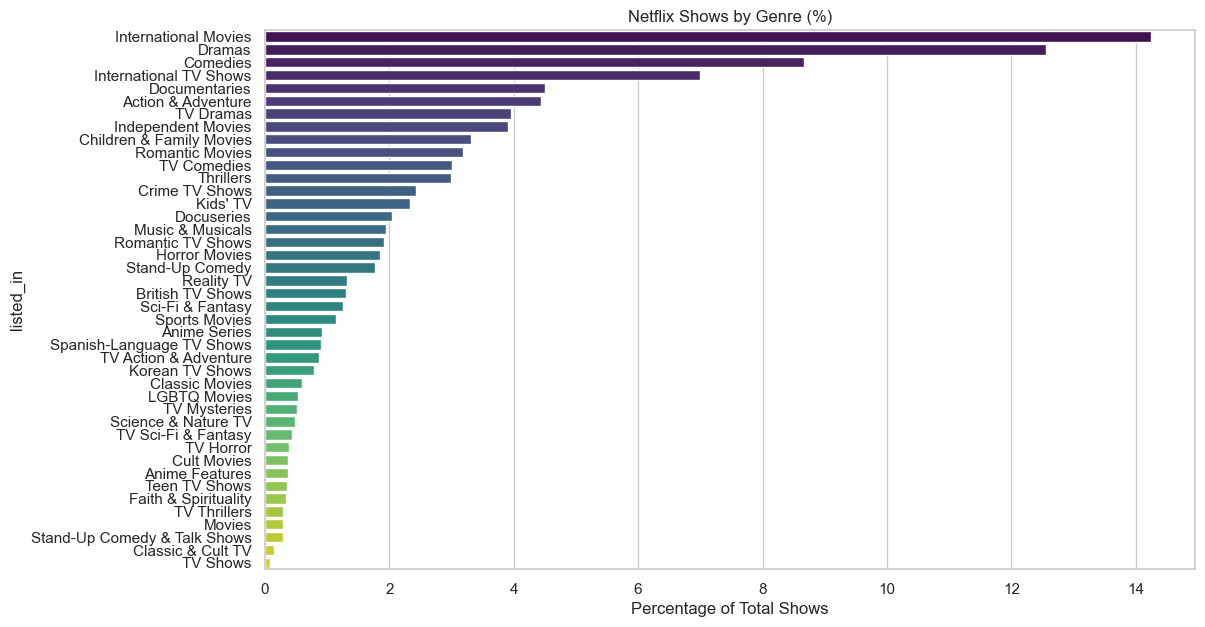

In [19]:
#Genre Analysis
# Split 'listed_in' into separate genres
all_genres = df['listed_in'].dropna().str.split(',').explode().str.strip()

# Count and percentage
genre_counts = all_genres.value_counts()
genre_percent = (genre_counts / genre_counts.sum()) * 100

# Plot
plt.figure(figsize=(12,7))
sns.barplot(x=genre_percent.values, y=genre_percent.index, palette="viridis")
plt.xlabel("Percentage of Total Shows")
plt.title("Netflix Shows by Genre (%)")
plt.show()




**Insight:** Drama and Comedies dominate Netflix content, followed by Documentaries and Action & Adventure.


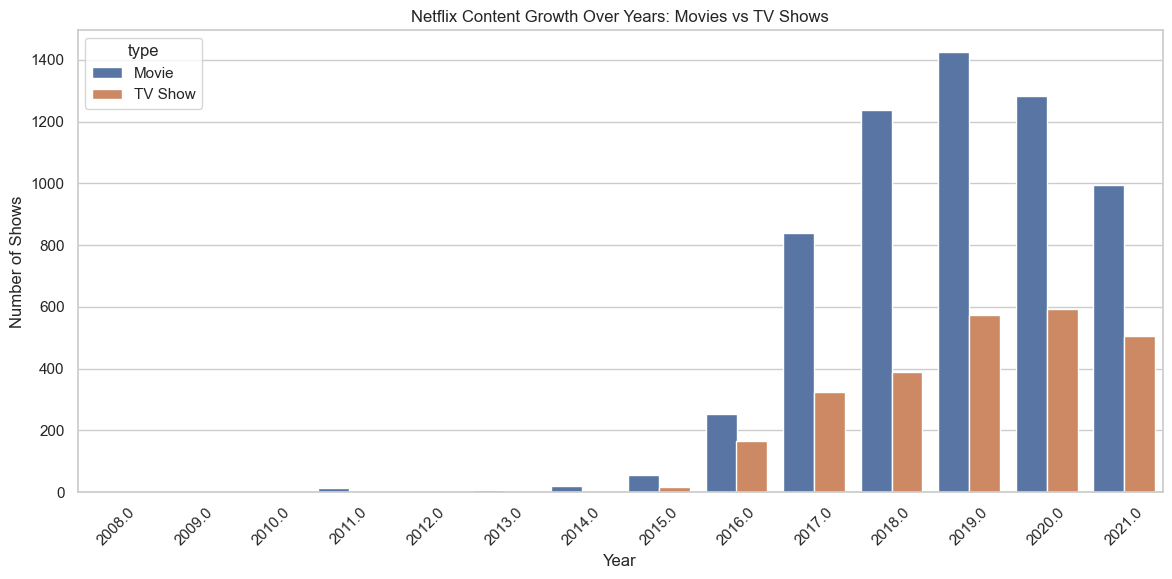

In [21]:
#Growth Over Years (Movies vs TV Shows)
plt.figure(figsize=(14,6))
sns.countplot(x='year_added', hue='type', data=df)
plt.title("Netflix Content Growth Over Years: Movies vs TV Shows")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.xticks(rotation=45)
plt.show()


**Insight:** Netflix content grew significantly after 2015, with maximum shows iin 2019 with more TV shows added than movies in recent years.


C:\Users\VISMAYA\AppData\Local\Temp\ipykernel_23580\1567224109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


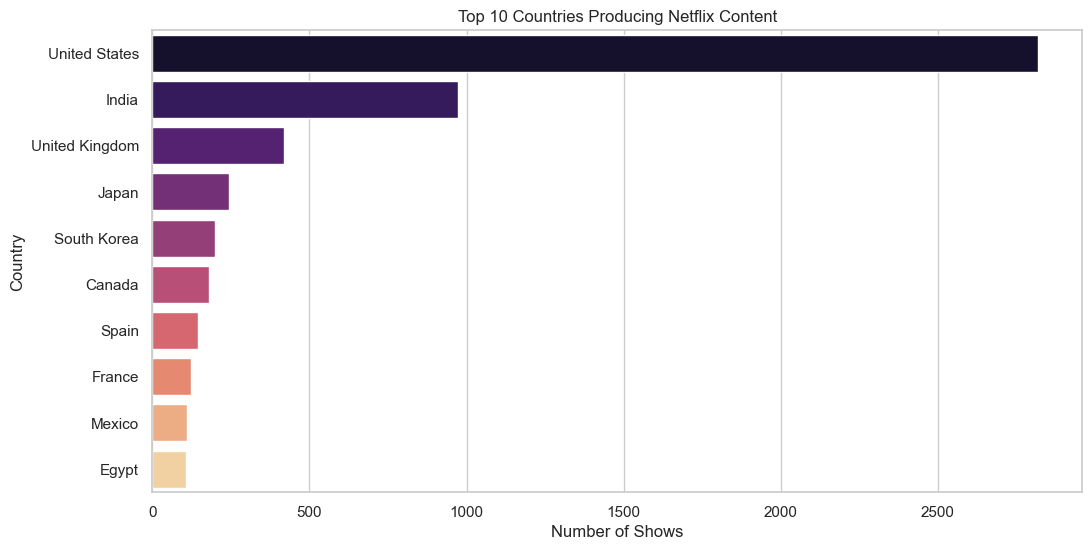

In [23]:
#Top Countries Producing Netflix Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.show()



**Insight:** USA, India, and UK lead in producing Netflix content.


C:\Users\VISMAYA\AppData\Local\Temp\ipykernel_23580\3485875791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")


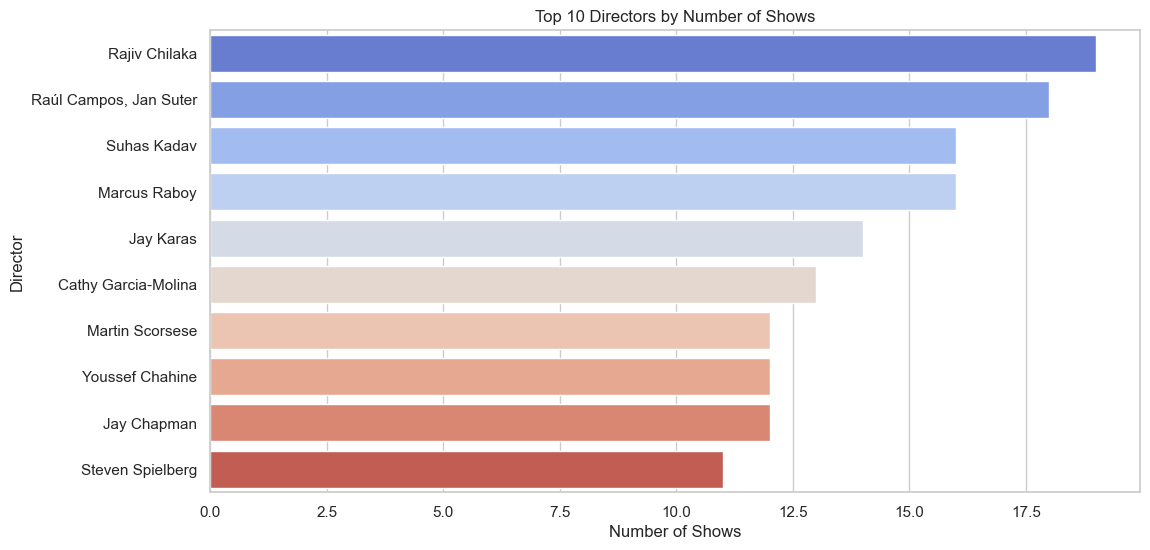

In [24]:
#Top Directors
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title("Top 10 Directors by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Director")
plt.show()


**Insight:** Some directors like 'Rajiv Chilaka', ‘Raúl Campos’ and ‘Jan Suter’ have multiple contributions across Netflix content.


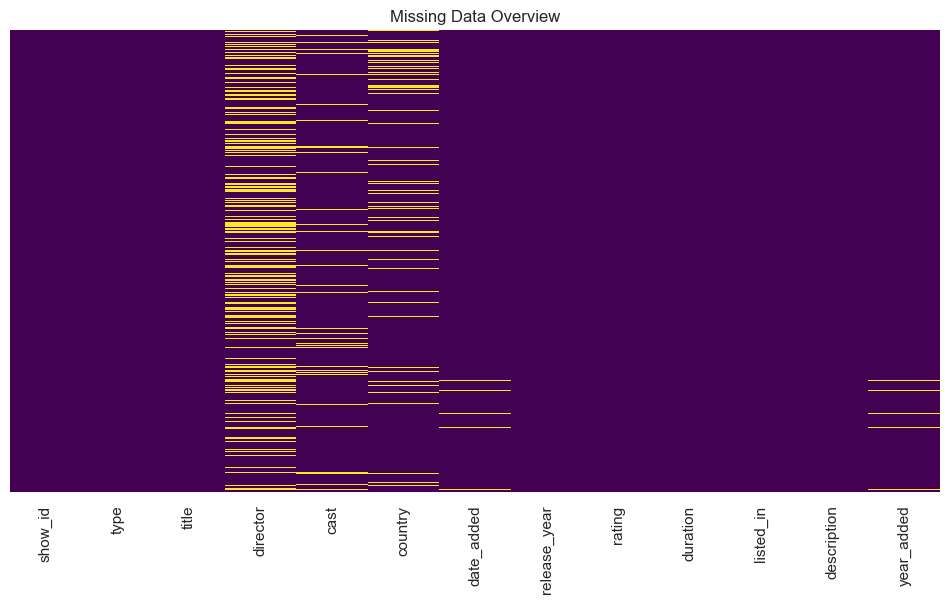

In [25]:
#Missing Data Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Data Overview")
plt.show()


**Observation:** Columns like `director` and `country` have missing values, which can affect certain analyses.


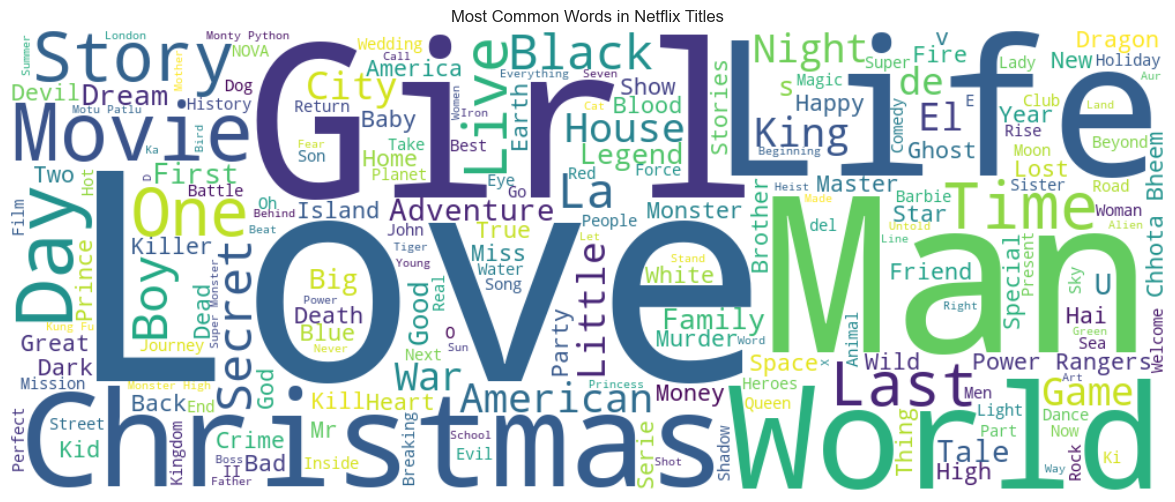

In [26]:
#WordCloud of Show Titles
text = " ".join(title for title in df['title'].dropna())
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Titles")
plt.show()


**Insight:** Common words include “Love”, “Life”, and “The”, reflecting common themes in Netflix content.


---
## Conclusion

- Drama and Comedy are the most popular genres.
- Netflix content has grown steadily over the years, with TV Shows increasing faster than movies.
- USA, India, and UK dominate content production.
- Certain directors contribute to multiple shows, highlighting recurring creators.
- WordCloud analysis shows common themes in titles.

This analysis meets all Task 3 requirements:
- Dataset selection and exploration
- Data cleaning and feature extraction
- Multiple research questions
- Advanced visualizations (bar charts, percentage charts, hue split, heatmap, WordCloud)
- Insights derived from visualizations
---
